https://stepik.org/lesson/1576178/step/5

In [ ]:
from sklearn.datasets import load_iris
import torch

iris = load_iris()
_global_var_data_x = torch.tensor(iris.data, dtype=torch.float32)
_global_var_target = torch.tensor(iris.target, dtype=torch.float32)

In [ ]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim


class IrisDataset(data.Dataset):
    def __init__(self):
        self.data = _global_var_data_x   # тензор размерностью (150, 4), тип float32
        self.target = _global_var_target # тензор размерностью (150, ), тип int64 (long)

        self.length = len(self.target)
        self.categories = ['setosa' 'versicolor' 'virginica'] # названия классов
        self.features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

    def __getitem__(self, item):
        return self.data[item], self.target[item]

    def __len__(self):
        return self.length


class IrisClassModel(nn.Module):
    def __init__(self, in_features=4, out_features=3):
        super().__init__()
        self.layer1 = nn.Linear(in_features, 16)
        self.layer2 = nn.Linear(16, out_features)

    def forward(self, x):
        x = self.layer1(x).relu()
        x = self.layer2(x)
        return x


torch.manual_seed(11)

# Создание модели IrisClassModel и перевод в режим обучения
model = IrisClassModel(4, 3)
model.train()

# Параметры градиентного спуска
epochs = 10     # число эпох обучения
batch_size = 8  # размер батча
lr = 0.01

# Создание объекта с разбиением на батчи
d_train = IrisDataset()
train_data = data.DataLoader(d_train, batch_size, shuffle=True, drop_last=False)

# Оптимизатор и функция потерь
optimizer = optim.Adam(params=model.parameters(), lr=lr)
loss_func = torch.nn.CrossEntropyLoss()

# Градиентный спуск
for _e in range(epochs): # итерации по эпохам
    for x_train, y_train in train_data:
        predict = model(x_train).squeeze()

        # Преобразование целевых значений в LongTensor
        y_train = y_train.long()
        loss = loss_func(predict, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Перевод модели в режим эксплуатации
model.eval()

# Прогноз модели по всем данным выборки
y_pred = torch.argmax(model(d_train.data), dim=1)

# Качество
Q = (y_pred.data == d_train.target).sum().item() / len(d_train)
print(Q)

# Вычисленные параметры многочлена (веса и смещение)
# print(*model.parameters())

0.96


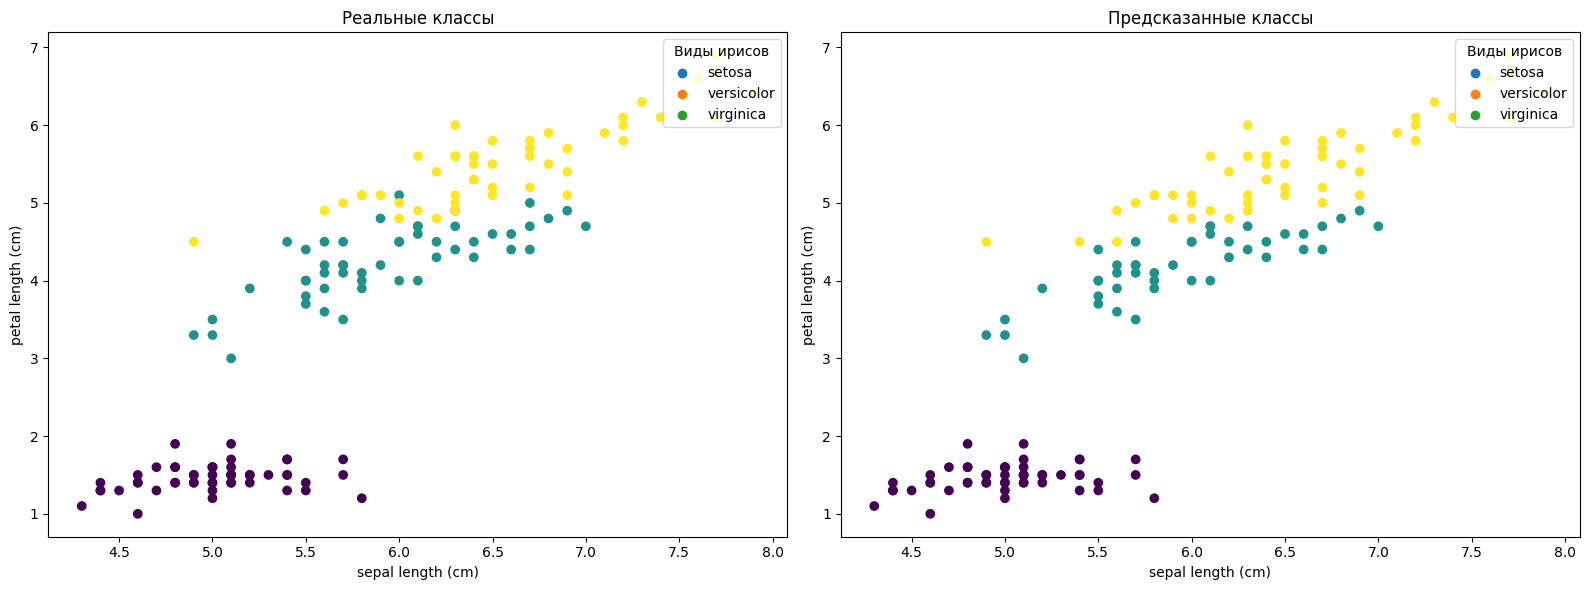

In [ ]:
# График
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Ещё раз загрузим исходник, так проще
iris = load_iris()

# Две доски под графики
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Реальные классы
axs[0].scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target)
axs[0].set_xlabel(iris.feature_names[0])  # Длина чашелистиков
axs[0].set_ylabel(iris.feature_names[2])  # Длина лепестков
axs[0].set_title("Реальные классы")
for i, target_name in enumerate(iris.target_names):
    axs[0].scatter([], [], label=target_name)
axs[0].legend(loc="upper right", title="Виды ирисов")

# График 2: Предсказанные классы
axs[1].scatter(iris.data[:, 0], iris.data[:, 2], c=y_pred)
axs[1].set_xlabel(iris.feature_names[0])  # Длина чашелистиков
axs[1].set_ylabel(iris.feature_names[2])  # Длина лепестков
axs[1].set_title("Предсказанные классы")
for i, target_name in enumerate(iris.target_names):
    axs[1].scatter([], [], label=target_name)
axs[1].legend(loc="upper right", title="Виды ирисов")

# Отображаем
plt.tight_layout()
plt.show()